#                                     App Rating Prediction 

Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

Content: Dataset: Google Play Store data (“googleplaystore.csv”)

In [1]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_rows', 500)
import numpy as np
from matplotlib import style
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\fsyed'

In [3]:
os.chdir('C:\\Users\\fsyed\\Desktop\\Firoz_Eugenus\\Firoz_Simpli Learn Training\\Programming Basics and Data Analytics with Python\\1569582940_googleplaystore')

In [4]:
Appsdata=pd.read_csv('googleplaystore.csv') ##1. Load the data using Pandas
Appsdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
Appsdata.isnull().sum() ## 2. Get the number of null values for each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
Appsdata.dropna(subset=['Current Ver','Android Ver','Type'],inplace=True) # 3. Drop the records with nulls in any of the columns
Appsdata=Appsdata.fillna({'Rating':Appsdata['Rating'].median(),'Content Rating':Appsdata['Rating'].median()}) # Imputed the median values
Appsdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
Appsdata.columns=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'] #### Formating/Renaming the Columns/Variables

In [8]:
Appsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [9]:
Appsdata.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10829,9648,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10829,33,FAMILY,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,10829,NaN,NaN,NaN,4.20651,0.480467,1,4.1,4.3,4.5,5
Reviews,10829,5999,0,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10829,457,Varies with device,1694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10829,20,"1,000,000+",1578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10829,2,Free,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10829,92,0,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content_Rating,10829,6,Everyone,8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10829,119,Tools,840,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# val = 5
#for element in enumerate['Size']:
   # try:
        #Appsdata['Size'][5] = float(element[:-1])*1000 if element[-1] == 'M' else element
   # except Exception as E:
        #print (E)
       # break

#print (val)
#Appsdata['Size']

In [11]:
def convert_to_int(val):
    """
    Function to convert each value of size to integer based on the conditon
    """
    if val[-1] == 'M':
        val = val.replace('M', '')
        if val.isnumeric():
            return int(val)
    
    if val[-1] == 'k':
        val = val.replace('k', '')
        if val.isnumeric():
            return int(val)
    return np.NaN

def format_install_values(val):
    val = val
    if ',' in val:
        val=val.replace(',','')
    if '+' in val:
        val = val.replace('+', '')
        
    return int(val)

def format_price_values(val):
    if '$'in val:
        val=val.replace('$','')

    return float(val)    
    
        
Appsdata['Size'] = Appsdata['Size'].apply(convert_to_int)
Appsdata['Size'] = Appsdata['Size'].fillna(Appsdata['Size'].median())
### Apply will replace a for loop
Appsdata['Installs'] = Appsdata['Installs'].apply(format_install_values)
Appsdata['Price'] = Appsdata['Price'].apply(format_price_values)

In [12]:
Appsdata['Reviews']=Appsdata['Reviews'].astype(int) ### Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).


In [13]:
Appsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1.1+ MB


In [14]:
Appsdata.drop(Appsdata[(Appsdata['Rating'] <1) & (Appsdata['Rating'] > 5)].index, inplace=True) ####1. Sanity checks

In [15]:
Appsdata.shape

(10829, 13)

In [16]:
Appsdata.drop(Appsdata[(Appsdata['Reviews']) > (Appsdata['Installs'])].index,inplace=True) #### 2. Sanity checks:

In [17]:
Appsdata.shape

(10818, 13)

In [18]:
Appsdata.drop(Appsdata[(Appsdata['Type']=='Free') & (Appsdata['Price']> 0)].index,inplace=True) ### 3. Sanity Checks

In [19]:
Appsdata.shape

(10818, 13)

In [20]:
Appsdata['Type'].describe()

count     10818
unique        2
top        Free
freq      10027
Name: Type, dtype: object

# 5. Performing univariate analysis:

In [21]:
#plt.figure(figsize=(12, 7))
#Appsdata['Price'].value_counts()
#sns.boxplot()

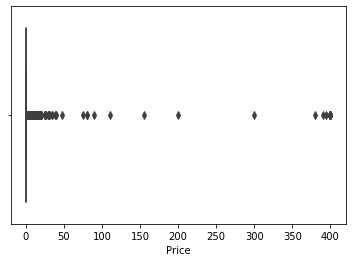

In [22]:
sns.boxplot(Appsdata['Price'],orient='V',) ### Boxplot for Price

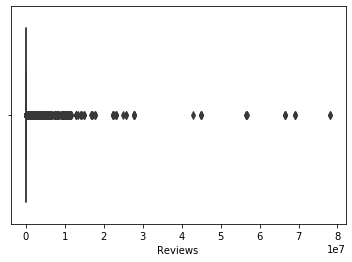

In [23]:
sns.boxplot(x='Reviews',data=Appsdata,palette='winter') ### Boxplot for Reviews

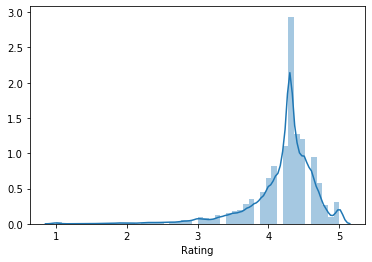

In [24]:
Appsdata['Rating'].head()## Histogram for Rating
sns.distplot(Appsdata['Rating']) ### Distribution curve is more towards Higher Ratings

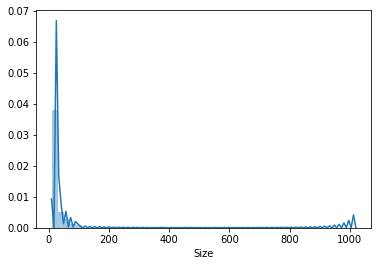

In [25]:
Appsdata['Size'].tail() ### Histogram for Size
sns.distplot(Appsdata['Size']) ## Size has more outliers

## 6. Outlier Treatment

In [26]:
Appsdata.describe().transpose() ## Max price is 400 $. So 200$ is indeed not a very high price. 

,count,mean,std,min,25%,50%,75%,max
Rating,10818.0,4.205981e+00,4.803106e-01,1.0,4.1,4.3,4.5,5.000000e+00
Reviews,10818.0,4.450529e+05,2.930668e+06,0.0,38.0,2107.5,55077.0,7.815831e+07
Size,10818.0,4.322666e+01,8.872927e+01,10.0,27.0,28.0,28.0,1.020000e+03
Installs,10818.0,1.549564e+07,8.511295e+07,0.0,5000.0,100000.0,5000000.0,1.000000e+09
Price,10818.0,1.028403e+00,1.596587e+01,0.0,0.0,0.0,0.0,4.000000e+02


In [27]:
#Appsdata.drop(Appsdata[(Appsdata['Price'].head(18))].index,axis=0,inplace=False) ### To drop the High prices
Appsdata['Price'].sort_values(ascending=False).head() ## Identify the records of very high prices
Appsdata.drop(Appsdata[(Appsdata['Price'] > 300)].index,inplace=True) ## Drop the records with very high prices

In [28]:
Appsdata.drop(Appsdata[(Appsdata['Reviews'] > 2000000)].index,inplace=True) #Drop records having more than 2 million reviews

In [29]:
Appsdata.describe(percentiles=[0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99]).transpose() # Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
Appsdata['Installs'].sort_values(ascending=False) ## Identify the records of very high installs
Appsdata['Installs'].median()
Appsdata.drop(Appsdata[(Appsdata['Installs'] > 100000.0)].index,inplace=True) ## Threshold i took as a median and dropped records of high values
Appsdata['Installs'].head()

0     10000
4    100000
5     50000
6     50000
9     10000
Name: Installs, dtype: int64

In [1]:
#total = Appsdata['Installs'].sum()
#total*0.5   
#Appsdata['Percentile_25%'] = Appsdata['Installs'].apply(lambda x: (x/total)*100)

sns.distplot(Appsdata['Installs'])


NameError: name 'sns' is not defined

In [31]:
Appsdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,28.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,28.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0,28.0,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,28.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,28.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


# 7. Bivariate analysis: 

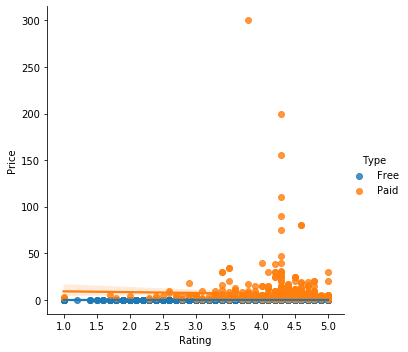

In [32]:
sns.lmplot(x='Rating',y='Price',hue='Type',data=Appsdata)

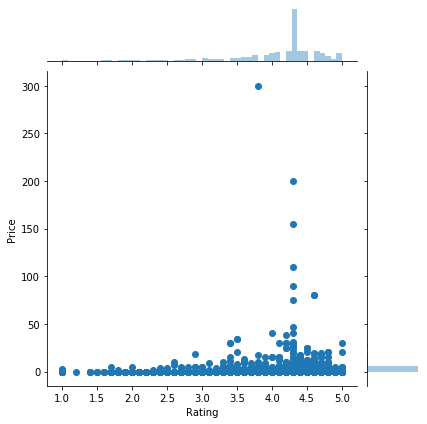

In [33]:
sns.jointplot(x='Rating',y='Price',data=Appsdata) ### Rating Increases with price

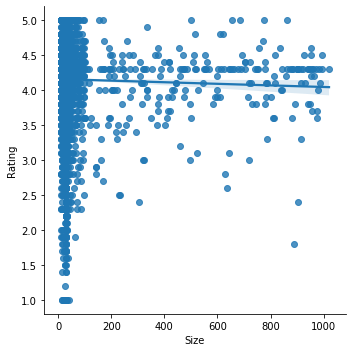

In [34]:
sns.lmplot(x='Size',y='Rating',data=Appsdata) ###Rating vs. Size

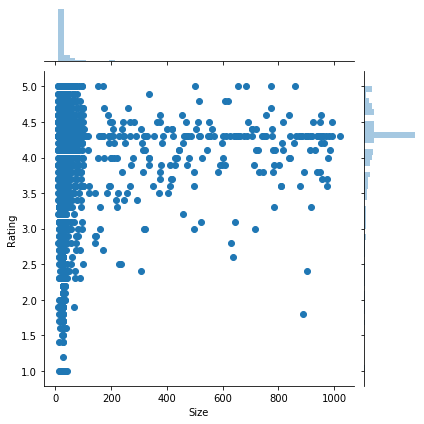

In [35]:
sns.jointplot(x='Size',y='Rating',data=Appsdata) ## heavier apps rated better

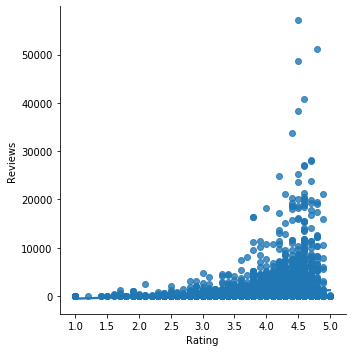

In [36]:
sns.lmplot(x='Rating',y='Reviews',data=Appsdata) ##Rating vs. Reviews

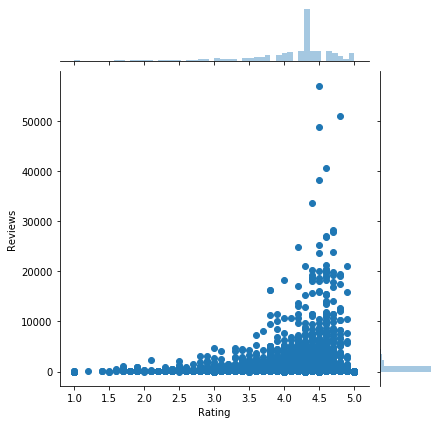

In [37]:
sns.jointplot(x='Rating',y='Reviews',data=Appsdata) ### more review mean a better rating always

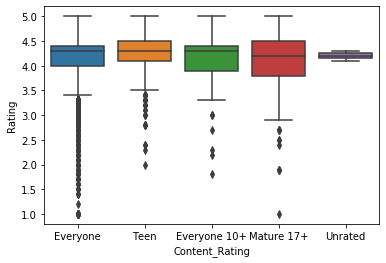

In [38]:
sns.boxplot(x='Content_Rating',y='Rating',data=Appsdata) #Some Apps are liked better

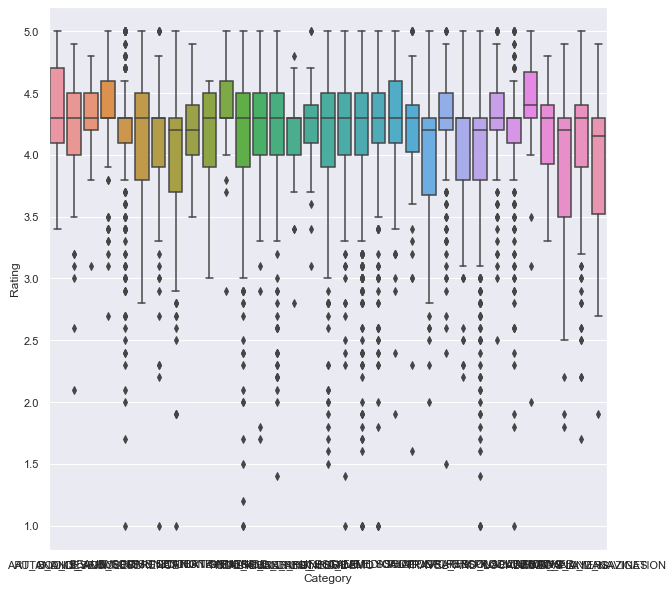

In [39]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='Category',y='Rating',data=Appsdata)

# 8. Data preprocessing

In [40]:
inp1=Appsdata.copy() ### Copying a dataframe

In [41]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5854 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5854 non-null   object 
 1   Category        5854 non-null   object 
 2   Rating          5854 non-null   float64
 3   Reviews         5854 non-null   int32  
 4   Size            5854 non-null   float64
 5   Installs        5854 non-null   int64  
 6   Type            5854 non-null   object 
 7   Price           5854 non-null   float64
 8   Content_Rating  5854 non-null   object 
 9   Genres          5854 non-null   object 
 10  Last_Updated    5854 non-null   object 
 11  Current_Ver     5854 non-null   object 
 12  Android_Ver     5854 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 617.4+ KB


In [42]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,28.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,28.0,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.3,0,28.0,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,28.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,28.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [43]:
inp1['Reviews'].apply(lambda x : np.log1p(x) if type(x) in [int,float] else 0)

0        5.075174
4        6.875232
5        5.123964
6        5.187386
9        4.804021
           ...   
10835    0.000000
10836    3.663562
10837    1.609438
10838    1.386294
10839    4.744932
Name: Reviews, Length: 5854, dtype: float64

In [44]:
inp1['Installs'].apply(lambda x : np.log1p(x) if type(x) in [int,float] else 0)

0         9.210440
4        11.512935
5        10.819798
6        10.819798
9         9.210440
           ...    
10835     2.397895
10836     8.517393
10837     4.615121
10838     6.908755
10839     6.908755
Name: Installs, Length: 5854, dtype: float64

In [45]:
inp1.drop(columns=['App','Last_Updated','Current_Ver','Android_Ver'], inplace=True)

In [46]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,967,28.0,100000,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,28.0,50000,Free,0.0,Everyone,Art & Design
6,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design
9,ART_AND_DESIGN,4.7,121,28.0,10000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10835,BUSINESS,4.3,0,28.0,10,Free,0.0,Everyone,Business
10836,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education
10837,FAMILY,5.0,4,28.0,100,Free,0.0,Everyone,Education
10838,MEDICAL,4.3,3,28.0,1000,Free,0.0,Everyone,Medical


In [47]:
inp2=pd.get_dummies(data=inp1,columns=['Category','Genres','Content_Rating','Type']) ### Creating Dummies
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Type_Free,Type_Paid
0,4.1,159,19.0,10000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4.3,967,28.0,100000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,4.4,167,28.0,50000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,3.8,178,19.0,50000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,4.7,121,28.0,10000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
inp2.isnull().sum()

Rating                                      0
Reviews                                     0
Size                                        0
Installs                                    0
Price                                       0
Category_ART_AND_DESIGN                     0
Category_AUTO_AND_VEHICLES                  0
Category_BEAUTY                             0
Category_BOOKS_AND_REFERENCE                0
Category_BUSINESS                           0
Category_COMICS                             0
Category_COMMUNICATION                      0
Category_DATING                             0
Category_EDUCATION                          0
Category_ENTERTAINMENT                      0
Category_EVENTS                             0
Category_FAMILY                             0
Category_FINANCE                            0
Category_FOOD_AND_DRINK                     0
Category_GAME                               0
Category_HEALTH_AND_FITNESS                 0
Category_HOUSE_AND_HOME           

In [49]:
inp1=inp1.merge(inp2,how='inner')
inp1.head()
inp1.columns
inp1.drop(['Category','Genres','Content_Rating','Type'],axis=1,inplace=True) ### Dropping the original variables
inp1
#inp1['Type'].info

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Type_Free,Type_Paid
0,4.1,159,19.0,10000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4.3,967,28.0,100000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,4.4,167,28.0,50000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3.8,178,19.0,50000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4.7,121,28.0,10000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26935,3.8,1195,582.0,100000,0.0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
26936,4.8,44,619.0,1000,0.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
26937,4.0,7,28.0,500,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
26938,4.5,38,53.0,5000,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
inp1.shape

(26940, 140)

In [51]:
#inp1['Type']=inp1['Type'].astype(str)
#inp1['Type']=inp1['Type'].str.replace('Free','').astype(float)
inp1.dtypes

Rating                                      float64
Reviews                                       int32
Size                                        float64
Installs                                      int64
Price                                       float64
Category_ART_AND_DESIGN                       uint8
Category_AUTO_AND_VEHICLES                    uint8
Category_BEAUTY                               uint8
Category_BOOKS_AND_REFERENCE                  uint8
Category_BUSINESS                             uint8
Category_COMICS                               uint8
Category_COMMUNICATION                        uint8
Category_DATING                               uint8
Category_EDUCATION                            uint8
Category_ENTERTAINMENT                        uint8
Category_EVENTS                               uint8
Category_FAMILY                               uint8
Category_FINANCE                              uint8
Category_FOOD_AND_DRINK                       uint8
Category_GAM

In [52]:
inp1.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Video Players & Editors', 'Genres_Weather', 'Genres_Word',
       'Content_Rating_Everyone', 'Content_Rating_Everyone 10+',
       'Content_Rating_Mature 17+', 'Content_Rating_Teen',
       'Content_Rating_Unrated', 'Type_Free', 'Type_Paid'],
      dtype='object', length=140)

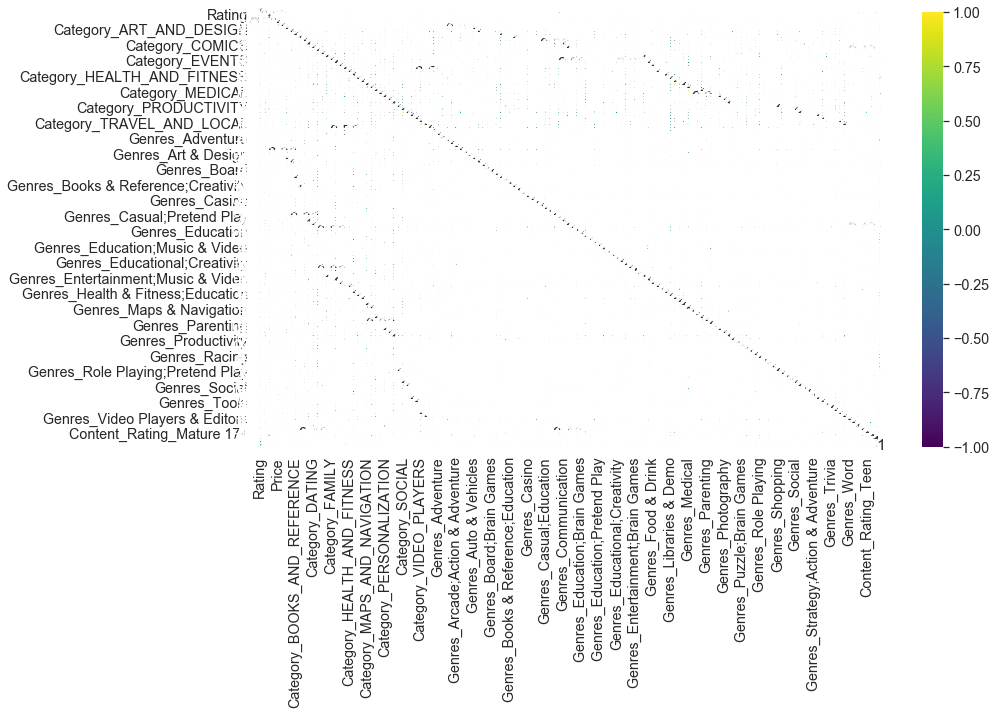

In [53]:
sns.set(rc={'figure.figsize':(14,8)},font_scale=1.3)
sns.heatmap(inp1.corr(),annot=True,cmap='viridis')  ### gives correlation value

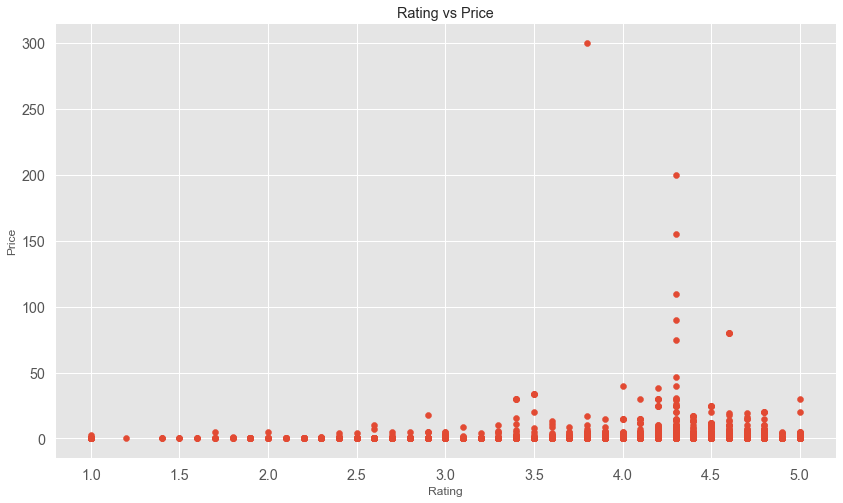

In [54]:
### SCATTER PLOT BETWEEN Rating and Price
style.use('ggplot')

##Rating vs Price
### scatter plots are part of matplotlib
plt.scatter(inp1['Rating'],inp1['Price'])

##set title of plot
plt.title('Rating vs Price')

##set label for x axis
plt.xlabel('Rating')

##set label for y axis
plt.ylabel('Price')

plt.show()

In [55]:
inp1 = inp1.iloc[:,0:]
inp1.head()


,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Type_Free,Type_Paid
0,4.1,159,19.0,10000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4.3,967,28.0,100000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,4.4,167,28.0,50000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3.8,178,19.0,50000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4.7,121,28.0,10000,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
print(inp1.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Video Players & Editors', 'Genres_Weather', 'Genres_Word',
       'Content_Rating_Everyone', 'Content_Rating_Everyone 10+',
       'Content_Rating_Mature 17+', 'Content_Rating_Teen',
       'Content_Rating_Unrated', 'Type_Free', 'Type_Paid'],
      dtype='object', length=140)


In [57]:
### DEFINE THE INDEPENDENT VARIABLES
### y = mx + b
#X = inp1[[]]
X = inp1.iloc[:,0:139]  

### DEFINE THE DEPENDENT VARIABLE
y = inp1['Rating']

#x is set of independent variables (I have used all independent variables)
#y is the dependent variable

In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#vif = pd.DataFrame()

#vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns
#vif

# MODEL BUILDING & FITTING THE MODEL USING TRAINING DATA

In [61]:
#### split the data into training and testing data using sci kit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [62]:
X.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Trivia;Education', 'Genres_Video Players & Editors',
       'Genres_Weather', 'Genres_Word', 'Content_Rating_Everyone',
       'Content_Rating_Everyone 10+', 'Content_Rating_Mature 17+',
       'Content_Rating_Teen', 'Content_Rating_Unrated', 'Type_Free'],
      dtype='object', length=139)

In [63]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.7,random_state=100)

In [64]:
X_train.head() ###Independent variable training dataset

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Type_Free
8359,4.3,0,28.0,10,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8826,4.3,0,28.0,10,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1705,4.3,1,28.0,100,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10841,4.3,0,28.0,10,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
26649,2.6,201,28.0,10000,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [65]:
X_test.head() ###Independent variable Test dataset

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Type_Free
21913,3.3,25,46.0,1000,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15559,4.3,0,28.0,10,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1069,4.3,1,28.0,100,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11091,4.3,0,28.0,10,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
16541,4.3,0,28.0,1,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
y_train.head()  ###Dependent variable Train dataset

8359     4.3
8826     4.3
1705     4.3
10841    4.3
26649    2.6
Name: Rating, dtype: float64

In [67]:
y_test.head() ###Dependent variable Test dataset

21913    3.3
15559    4.3
1069     4.3
11091    4.3
16541    4.3
Name: Rating, dtype: float64

# training data using our Linear Regression model
pass x and y from xtrain to the model 
the model executes the formula y = mx + c + e

In [68]:
### training the model on linear regression
### sklearn.linear_model, LinearRegression will have the linear equation y=mx+b
from sklearn.linear_model import LinearRegression

In [69]:
#fitting our model to train and test
### instantiate an instance of linear regression object
#### fit is used for fitting the model to training data.

lm = LinearRegression()

### MODELFITSTRAIN - use the LinearRegression() function on my training data 
lm.fit(X_train,y_train) #### no need to set this to any variable. its inplace.


#### we get an output stating that the linear regression model has been trained

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
type(lm)

sklearn.linear_model._base.LinearRegression

In [71]:
### Y=mx+c

####  intercept  - value of ytrain when each independent variable in xtrain is 0
print(lm.intercept_) 
#### 1.3 is the value of y when all the independent variables have a value of 0

-1.2184031561446318e-11


In [72]:
### to view the coefficients of the linear model of the independent variables - "m"
lm.coef_
### y-m1X1+m2X2+m3X3

array([ 1.00000000e+00,  4.19146457e-16,  4.08460718e-15, -8.22065393e-18,
        2.96071145e-13, -7.97513956e-12,  7.43771109e-13,  3.49841911e-12,
        4.80214468e-13, -3.37067772e-13,  1.17589770e-11, -2.30441212e-13,
       -1.20692267e-12, -2.46808472e-11, -4.99940558e-12, -3.65934887e-12,
        5.20205316e-12,  2.58565422e-13,  2.82895815e-12,  2.38071830e-11,
       -1.80676531e-13, -2.33119199e-12, -1.52637618e-12, -6.75968776e-13,
       -2.98196105e-12, -1.00719249e-13,  7.53094448e-13, -4.34054720e-12,
       -3.69321413e-13,  2.18167679e-12, -6.15134376e-13, -4.95634433e-13,
        1.75929765e-13,  2.29069379e-14, -2.29237543e-13,  1.83760124e-13,
        1.24456017e-12,  3.79587207e-12, -4.40978781e-11,  1.66834472e-11,
       -1.31900282e-12, -1.29246971e-26, -3.87740912e-26,  3.51451479e-11,
       -1.68923473e-11, -7.97513956e-12, -2.07075988e-29,  1.01596656e-29,
        7.43771109e-13,  3.49841911e-12,  1.24588720e-11,  2.68521701e-12,
       -9.47088765e-12,  

In [73]:
X_train.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       ...
       'Genres_Trivia;Education', 'Genres_Video Players & Editors',
       'Genres_Weather', 'Genres_Word', 'Content_Rating_Everyone',
       'Content_Rating_Everyone 10+', 'Content_Rating_Mature 17+',
       'Content_Rating_Teen', 'Content_Rating_Unrated', 'Type_Free'],
      dtype='object', length=139)

# Make Predictions and Report the R2 on the train set

In [74]:
### predict with training data alone
pred_xt = lm.predict(X_train)  ## Lm  is the linear regression model
                               #X_train has all the independent variables in the train dataset
                            #predicting the value of Y using the independent variables in the train dataset

In [75]:
### predicting on training data of independent variables
pred_xt

array([4.3, 4.3, 4.3, ..., 4.3, 4.4, 4.3])

In [76]:
#accuracy_score(y_train,pred_xt)
#print(mean_squared_error(y_train, pred_xt))
print(r2_score(y_train, pred_xt))

1.0


# Make predictions on test set and report R2 on Test Set

Predictions are done using the Model (That was built with training data) and now running it on the test data.
If the predicted value of Dependent variable Rating is closer to the actual value of dependent variable we have a good model

In [77]:
pred_y = lm.predict(X_test) #x_test has all the independent variables in the test dataset
                            #predicting the value of Y using the independent variables in the test dataset

In [78]:
pred_y ##### accuracy for predicting on testing data

array([3.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3])

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#print(mean_squared_error(y_test, pred_y))
print(r2_score(y_test, pred_y))

1.0


Text(0, 0.5, 'Predicted Y')

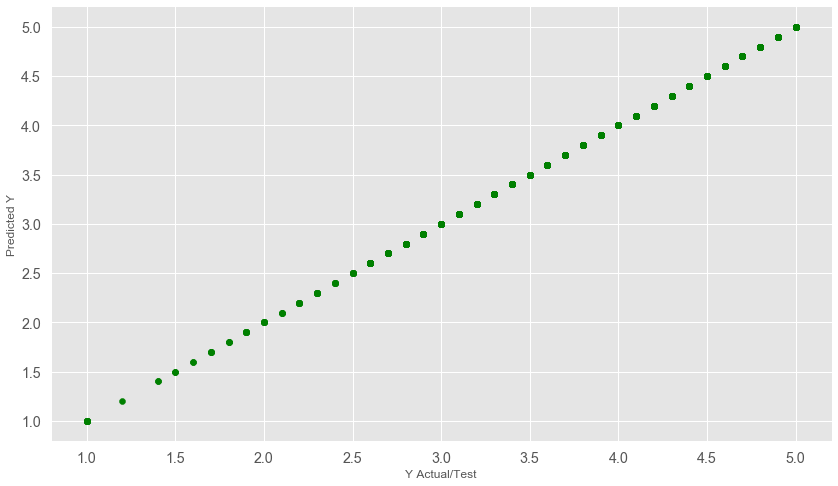

In [80]:
### Visualtion of predictive results
plt.scatter(y_test,pred_y,color='green',cmap='viridis')

plt.xlabel('Y Actual/Test') 
plt.ylabel('Predicted Y') 

In [81]:
y_test

21913    3.3
15559    4.3
1069     4.3
11091    4.3
16541    4.3
        ... 
17304    4.3
13003    4.3
12378    4.3
9821     4.3
12499    4.3
Name: Rating, Length: 18858, dtype: float64

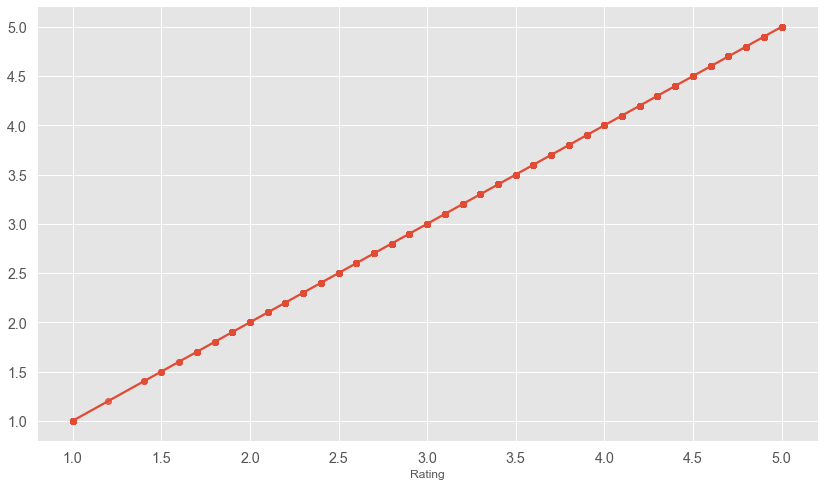

In [82]:
sns.regplot(y_test,pred_y)

In [86]:
import pdfkit
#pdfkit.from_file('App Rating Prediction Project - Firoz Syed (25 APR-24 May 2020).html', 'Project_Firoz_25APR_24MAY2020.pdf') 